In [1]:
import os

train_dir = './data/clean'  # Set the dataset directory

words = []

for root, dirs, files in os.walk(train_dir, topdown=True):
    for name in files:
        words.append(name.split('_')[-1].split('.')[0])

In [2]:
words_set = set(words)
num_unique_words = len(words_set)

num_unique_words

1099

In [3]:
word_dict = []
for word in words_set:
    word_dict.append([word, 0])
word_dict = dict(word_dict)

for word in words:
    word_dict[word] += 1

x = []
for (key, value) in word_dict.items():
    x.append(value)

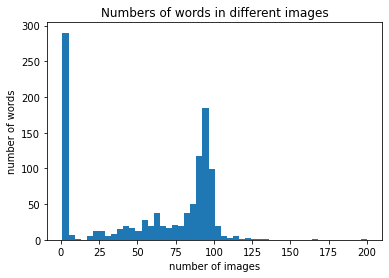

In [4]:
import matplotlib.pyplot as plt

plt.hist(x, bins=50)
plt.title('Numbers of words in different images')
plt.xlabel('number of images')
plt.ylabel('number of words')
plt.show()

In [5]:
with open('training data dic.txt') as f:
    wordset = f.read().split('\n')

word_dict = []
for word in wordset:
    word_dict.append([word, 0])
word_dict.append(['isnull', 0])
word_dict = dict(word_dict)

for word in words:
    if word in wordset:
        word_dict[word] += 1
    else:
        word_dict['isnull'] += 1

y = []
for (key, value) in word_dict.items():
    y.append(value)

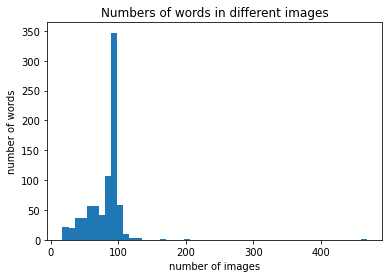

In [6]:
import matplotlib.pyplot as plt

plt.hist(y, bins=50)
plt.title('Numbers of words in different images')
plt.xlabel('number of images')
plt.ylabel('number of words')
plt.show()

In [7]:
import numpy as np

print(f'Minimum: {np.min(y)}')
print(f'Maximum: {np.max(y)}')
print(f'Maximum except isnull: {np.max(y[:-2])}')
print(f'Average: {np.average(y)}')
print(f'Average except isnull: {np.average(y[:-2])}')
print(f'Standard: {np.std(y)}')
print(f'Standard except isnull: {np.std(y[:-2])}')

Minimum: 17
Maximum: 468
Maximum except isnull: 200
Average: 81.2059925093633
Average except isnull: 80.80100125156446
Standard: 26.22687462992639
Standard except isnull: 22.297099582928094
